In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# local packages 
from utils_causal import *

import pickle

/home/guo/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
# TO DO
# 
# Kalman 
# structural bayeisan time series
# feature extration on time series


rmse 0.3550972100169377 0.002666043913794741
mae 0.24777184127553947 0.002857704487856903
[[4, 0.6981583], [5, 0.15599783], [3, 0.09633694], [1, 0.031105526]]
(2000,) 0.6981583
(2000,) 0.15599783
(2000,) 0.09633694
(2000,) 0.031105526


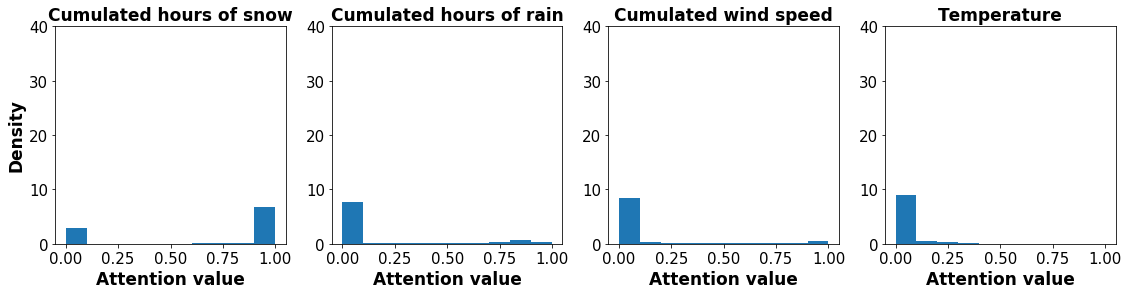

In [41]:
#  PM2.5  Dual

# -- Data -- 
pkl_file = "../../ts_results/pickle/pm25_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])

# ganger causal: 0,1,2
num_ex_vari = 7
vari_name = ['Dew Point', 'Temperature', 'Pressure', 'Cumulated wind speed', \
             'Cumulated hours of snow','Cumulated hours of rain']


#  --- rank variables according to attention ---
np.shape(att)
att = np.transpose(att,[1,0])

att_mean =[]
for i in range(num_ex_vari-1):
    tmp = att[i]
    att_mean.append([i, mean(tmp)])

sort_att_mean = sorted(att_mean, key = lambda x:x[1], reverse= True)
print sort_att_mean[:4]


#  --- plot ---

fig, ax = plt.subplots(1, 4, figsize=(19,4))
ax_idx = 0

# variate attention distribution
for i in sort_att_mean[:4]:
    
    idx = i[0]
    
    tmp = att[idx]
    print np.shape(tmp), mean(tmp)
    
    ax[ax_idx].hist(tmp, density = True)
#     ax[ax_idx].set_xlim(0, 0.5)
    ax[ax_idx].set_ylim(0, 40)
    ax[ax_idx].set_title( vari_name[int(idx)], fontweight = 'bold', fontsize=17)
    
    ax[ax_idx].xaxis.set_tick_params(labelsize=15)
    ax[ax_idx].yaxis.set_tick_params(labelsize=15)
    
    ax[ax_idx].set_xlabel('Attention value', fontweight = 'bold', fontsize=17)
    if ax_idx ==0:
        ax[ax_idx].set_ylabel('Density', fontweight = 'bold', fontsize=17)
    
    ax_idx += 1

fig.savefig('../../ts_results/figure/pm_dual.eps', bbox_inches='tight')

rmse 0.3711821328239959 0.005928918496652915
mae 0.24878121366912032 0.005741588148647269
[[9, 0.13146618], [5, 0.12250754], [11, 0.110023275], [1, 0.109782405]]
(2000,) 0.13146618
(2000,) 0.12250754
(2000,) 0.110023275
(2000,) 0.109782405


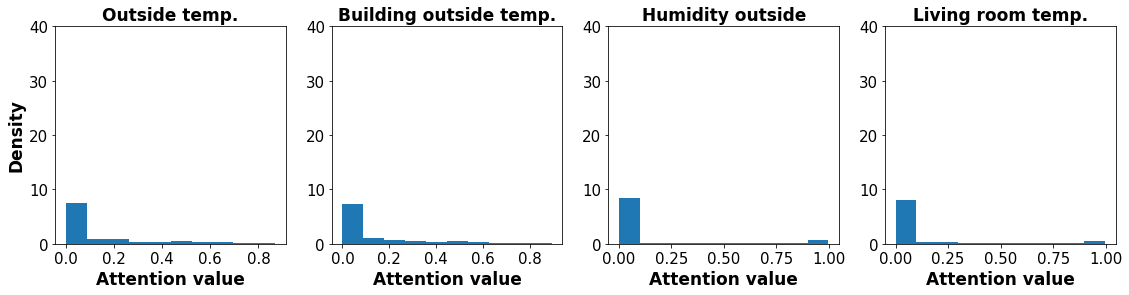

In [40]:
# ENERGY Dual
pkl_file = "../../ts_results/pickle/energy_dual.pickle"
pkl_file = open(pkl_file, 'rb')

data = pickle.load(pkl_file)
att = data['attention']
rmse = data['rmse']

print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])


#  --- rank variables according to attention ---
np.shape(att)
att = np.transpose(att,[1,0])

att_mean =[]
for i in range(num_ex_vari-1):
    tmp = att[i]
    att_mean.append([i, mean(tmp)])

sort_att_mean = sorted(att_mean, key = lambda x:x[1], reverse= True)
print sort_att_mean[:4]


# ganger causal: 1,8
num_ex_vari = 13
vari_name = ['Kitchen temp.', 'Living room temp.', 'Laundry room temp.', 'Office room temp.',\
             'Bathroom temp.','Building outside temp.', 'Ironing room temp.', 'Teenager room temp.',\
             'Parents room temp.', 'Outside temp.', 'Wind speed', 'Humidity outside', 'Dew point'  ]

#  --- plot ---

fig, ax = plt.subplots(1, 4, figsize=(19,4))
ax_idx = 0

# variate attention distribution
for i in sort_att_mean[:4]:
    
    idx = i[0]
    
    tmp = att[idx]
    print np.shape(tmp), mean(tmp)
    
    ax[ax_idx].hist(tmp, density = True)
#     ax[ax_idx].set_xlim(0, 0.5)
    ax[ax_idx].set_ylim(0, 40)
    ax[ax_idx].set_title( vari_name[int(idx)], fontweight = 'bold', fontsize=17)
    
    ax[ax_idx].xaxis.set_tick_params(labelsize=15)
    ax[ax_idx].yaxis.set_tick_params(labelsize=15)
    
    ax[ax_idx].set_xlabel('Attention value', fontweight = 'bold', fontsize=17)
    if ax_idx ==0:
        ax[ax_idx].set_ylabel('Density', fontweight = 'bold', fontsize=17)
    
    ax_idx += 1

fig.savefig('../../ts_results/figure/energy_dual.eps', bbox_inches='tight')

In [4]:
#  PM2.5  RETAIN

# -- Data -- 
pkl_file = "../../ts_results/pickle/pm25_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

rmse = data['rmse']
print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])


rmse 1.111472080874119 0.017999750454308145
mae 0.9427874133069872 0.018337017939015755


In [5]:
#  ENERGY  RETAIN

# -- Data -- 
pkl_file = "../../ts_results/pickle/energy_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

rmse = data['rmse']
print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])


rmse 0.6687385245825427 0.006220413289078888
mae 0.5068904892213677 0.01556708122159307


In [6]:
# MV-LSTM 

file_dic_ml = {}
    
file_addr = ["../../dataset/dataset_ts/air_xtrain.dat", \
                 "../../dataset/dataset_ts/air_xtest.dat",\
                 "../../dataset/dataset_ts/air_ytrain.dat", \
                 "../../dataset/dataset_ts/air_ytest.dat"]
file_dic_ml.update( {"air": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/energy_xtrain.dat", \
                 "../../dataset/dataset_ts/energy_xtest.dat",\
                 "../../dataset/dataset_ts/energy_ytrain.dat", \
                 "../../dataset/dataset_ts/energy_ytest.dat"]
file_dic_ml.update( {"energy": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/pm25_xtrain.dat", \
                 "../../dataset/dataset_ts/pm25_xtest.dat",\
                 "../../dataset/dataset_ts/pm25_ytrain.dat", \
                 "../../dataset/dataset_ts/pm25_ytest.dat"]
file_dic_ml.update( {"pm25": file_addr} )



file_dic_statis = {}
    
file_addr = ["../../dataset/dataset_ts/air_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/air_xtest_statis.dat"]
file_dic_statis.update( {"air": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/energy_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/energy_xtest_statis.dat"]
file_dic_statis.update( {"energy": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/pm25_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/pm25_xtest_statis.dat"]
file_dic_statis.update( {"pm25": file_addr} )

file_addr = ["../../dataset/dataset_ts/plant_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/plant_xtest_statis.dat"]
file_dic_statis.update( {"plant": file_addr} )

In [ ]:
# bayes posterior of attention





In [14]:
# ENERGY : MV-LSTM attention

# ganger causal: 1,8
num_ex_vari = 14
vari_name = ['Kitchen temp.', 'Living room temp.', 'Laundry room temp.', 'Office room temp.',\
             'Bathroom temp.','Building outside temp.', 'Ironing room temp.', 'Teenager room temp.',\
             'Parents room temp.', 'Outside temp.', 'Wind speed', 'Humidity outside', 'Dew point', 'auto-reg'  ]
# T1, Temperature in kitchen area 
# T2, Temperature in living room area, in Celsius 
# T3, Temperature in laundry room area 
# T4, Temperature in office room, in Celsius 
# T5, Temperature in bathroom, in Celsius 
# T6, Temperature outside the building (north side), in Celsius 
# T7, Temperature in ironing room , in Celsius 
# T8, Temperature in teenager room 2, in Celsius 
# T9, Temperature in parents room, in Celsius 
# To, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 


py_ts = np.load("../../ts_results/energy_1.00.0001_21.dat")
print np.shape(py_ts)

cols = ['truth', 'pred'] + [str(i) for i in range(num_ex_vari)] + ['indi' + str(i) for i in range(num_ex_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)

print py_df.shape, py_df.columns


# print py_df[['truth','pred']].iloc[:3]
# print py_df[att_cols].iloc[:3]


# # variate attention distribution
# att_mean =[]
# for i in att_cols:
#     tmp = py_df[i]
#     att_mean.append([i, mean(tmp)])

# sort_att_mean = sorted(att_mean, key = lambda x:x[1], reverse= True)
# # print sort_att_mean[:]

# for i in sort_att_mean:
#     print vari_name[int(i[0])], i[1]


# # # PLOT
# fig, ax = plt.subplots(1, 4, figsize=(19,4))
# ax_idx = 0

# sample_att_mean =  [sort_att_mean[0], sort_att_mean[1], sort_att_mean[2], sort_att_mean[4]]

# # variate attention distribution
# for i in sample_att_mean:
    
#     idx = i[0]
    
#     tmp = py_df[idx]
    
#     ax[ax_idx].hist(tmp, density = True)
#     ax[ax_idx].set_xlim(0, 0.5)
#     ax[ax_idx].set_ylim(0, 100)
#     ax[ax_idx].set_title( vari_name[int(idx)], fontweight = 'bold', fontsize=17)
    
#     ax[ax_idx].xaxis.set_tick_params(labelsize=15)
#     ax[ax_idx].yaxis.set_tick_params(labelsize=15)
    
#     ax[ax_idx].set_xlabel('Attention value', fontweight = 'bold', fontsize=17)
#     if ax_idx ==0:
#         ax[ax_idx].set_ylabel('Density', fontweight = 'bold', fontsize=17)

    
#     ax_idx += 1
    
# fig.savefig('../../ts_results/figure/energy_mv.eps', bbox_inches='tight')

(2113, 30)
(2113, 30) Index([u'truth', u'pred', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8',
       u'9', u'10', u'11', u'12', u'13', u'indi0', u'indi1', u'indi2',
       u'indi3', u'indi4', u'indi5', u'indi6', u'indi7', u'indi8', u'indi9',
       u'indi10', u'indi11', u'indi12', u'indi13'],
      dtype='object')


(2000, 9)
(2000, 9)
      truth      pred
0  4.248495  4.058376
1  4.290460  4.242391
2  4.343806  4.247853
          0         1         2         3         4         5         6
0  0.443736  0.086686  0.164143  0.139480  0.015177  0.091475  0.059302
1  0.448109  0.086966  0.163548  0.143059  0.014821  0.089689  0.053807
2  0.450870  0.085471  0.163621  0.142187  0.014420  0.090804  0.052626
[['0', 0.43822114875912666], ['2', 0.1839078705124557], ['3', 0.14064060382172466], ['1', 0.08301081561669707]]


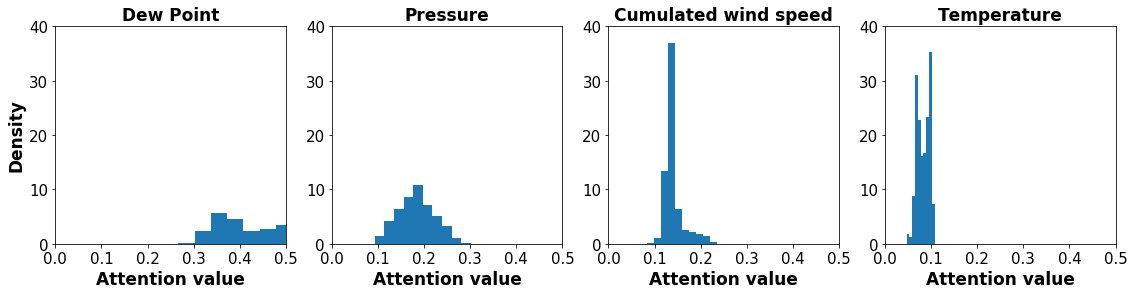

In [38]:
# PM25 : MV-LSTM attention

# ganger causal: 0,1,2
num_ex_vari = 7
vari_name = ['Dew Point', 'Temperature', 'Pressure', 'Cumulated wind speed', \
             'Cumulated hours of snow','Cumulated hours of rain']

py_ts = np.load("../../ts_results/pm_mv_1.dat")
print np.shape(py_ts)

cols = ['truth', 'pred'] + [str(i) for i in range(num_ex_vari)]
att_cols = [str(i) for i in range(num_ex_vari)]
print np.shape(py_ts)
py_df = pd.DataFrame( py_ts, columns = cols)

print py_df[['truth','pred']].iloc[:3]
print py_df[att_cols].iloc[:3]

att_mean =[]
for i in att_cols:
    tmp = py_df[i]
    att_mean.append([i, mean(tmp)])

sort_att_mean = sorted(att_mean, key = lambda x:x[1], reverse= True)
print sort_att_mean[:4]


fig, ax = plt.subplots(1, 4, figsize=(19,4))
ax_idx = 0

# variate attention distribution
for i in sort_att_mean[:4]:
    
    idx = i[0]
    
    tmp = py_df[idx]
    
    ax[ax_idx].hist(tmp, density = True)
    ax[ax_idx].set_xlim(0, 0.5)
    ax[ax_idx].set_ylim(0, 40)
    ax[ax_idx].set_title( vari_name[int(idx)], fontweight = 'bold', fontsize=17)
    
    ax[ax_idx].xaxis.set_tick_params(labelsize=15)
    ax[ax_idx].yaxis.set_tick_params(labelsize=15)
    
    ax[ax_idx].set_xlabel('Attention value', fontweight = 'bold', fontsize=17)
    if ax_idx ==0:
        ax[ax_idx].set_ylabel('Density', fontweight = 'bold', fontsize=17)
    
    ax_idx += 1

fig.savefig('../../ts_results/figure/pm_mv.eps', bbox_inches='tight')

In [ ]:
# ---- statistical analysis

# load data for statistical analysis

# feature_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

# DEWP: Dew Point (â„ƒ) 
# TEMP: Temperature (â„ƒ) 
# PRES: Pressure (hPa) 
# cbwd: Combined wind direction 
# Iws: Cumulated wind speed (m/s) 
# Is: Cumulated hours of snow 
# Ir: Cumulated hours of rain 

# the last column is the targe variable 
dataset_str = 'pm25'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)


# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 6)

#print causality_pairwise(VAR_res, post_ts)

In [8]:
# load data for statistical analysis

# feature_cols = [ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9' , 'T_out', 'Windspeed', 'RH_out', \
# 'Tdewpoint' 


# -- target series
# Appliances, energy use in Wh 
# lights, energy use of light fixtures in the house in Wh 

# -- exgoneous series 
# T1, Temperature in kitchen area, in Celsius 
# T2, Temperature in living room area, in Celsius 
# T3, Temperature in laundry room area 
# T4, Temperature in office room, in Celsius 
# T5, Temperature in bathroom, in Celsius 
# T6, Temperature outside the building (north side), in Celsius 
# T7, Temperature in ironing room , in Celsius 
# T8, Temperature in teenager room 2, in Celsius 
# T9, Temperature in parents room, in Celsius 
# To, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 


# the last column is the targe variable 
dataset_str = 'energy'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 13)

#print causality_pairwise(VAR_res, post_ts)

(8200, 14) (2200, 14)
stationary prepro:  0 1.53873681466e-08 

stationary prepro:  0 2.67332352376e-10 

stationary prepro:  0 6.22084629443e-06 

stationary prepro:  0 7.65852979756e-08 

stationary prepro:  0 4.56317841218e-09 

stationary prepro:  0 3.12028393606e-05 

stationary prepro:  0 0.00215212148204 

stationary prepro:  0 0.000159225901517 

stationary prepro:  1 0.0 

stationary prepro:  0 8.14779094622e-05 

stationary prepro:  0 8.95657918297e-07 

stationary prepro:  0 9.36092515117e-17 

stationary prepro:  0 0.00688669851617 

stationary prepro:  0 4.24157747612e-26 

(8199, 14)
best lag:  {'fpe': 26, 'hqic': 14, 'bic': 8, 'aic': 26}
[1, 8]


In [9]:
# load data for statistical analysis

# feature_cols = ['p-temperature', 'cloudcover', 'dewpoint', 'humidity', 'temperature', 'windbearing', 'windspeed']


# the last column is the targe variable 
dataset_str = 'plant'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 7)

#print causality_pairwise(VAR_res, post_ts)

(5400, 8) (1554, 8)
stationary prepro:  1 3.89605902543e-30 

stationary prepro:  0 5.8135957626e-09 

stationary prepro:  0 0.00897549257369 

stationary prepro:  0 5.50436184832e-05 

stationary prepro:  1 0.0 

stationary prepro:  0 9.23194064666e-19 

stationary prepro:  0 2.9333505289e-20 

stationary prepro:  0 8.96960810192e-09 

(5399, 8)
best lag:  {'fpe': 39, 'hqic': 20, 'bic': 19, 'aic': 39}
[0, 1, 2, 4]


In [ ]:
# statisical test 
trans_dta = np.transpose(xtr, [1,0])
for i in range(np.shape(xtr)[1]):
    print '--', i, stationary_test( trans_dta[i] )

In [ ]:
# temporal dependency

temporal_detect_individual(6, xtr, 200)

# auto-correlation, partial auto-correlation, cross correlation 
